In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
Image.LOAD_TRUNCATED_IMAGES = True
from datetime import datetime
import shutil
import pickle
from sklearn.model_selection import train_test_split

from __future__ import print_function
import keras
from keras import applications
from keras.models import Sequential
from keras.layers import Conv2D,Conv3D,MaxPooling2D
from keras import backend as K
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
from keras.initializers import RandomNormal
from keras.initializers import he_normal
from keras.applications import vgg16 as vgg
from keras.applications.resnet50 import ResNet50
from keras.optimizers import adam
from keras import optimizers
from keras.models import Model

from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/
# https://stackoverflow.com/questions/33101659/convert-from-cmyk-to-rgb
# https://stackoverflow.com/questions/27745500/how-to-save-a-list-to-a-file-and-read-it-as-a-list-type
# https://towardsdatascience.com/image-forgery-detection-2ee6f1a65442
# https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/
# https://github.com/dipanjanS/hands-on-transfer-learning-with-python/blob/master/notebooks/Ch06%20-%20Image%20Recognition%20and%20Classification/CIFAR10_VGG16_Transfer_Learning_Classifier.ipynb


In [2]:
pristine_path = "C:/Users/Administrator/Documents/Datasets/Image Forensic Challenge/phase-01-training/dataset-dist/phase-01/training/pristine/"
fake_path  = "C:/Users/Administrator/Documents/Datasets/Image Forensic Challenge/phase-01-training/dataset-dist/phase-01/training/fake/"

<bound method Image.getdata of <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x768 at 0x1EC9ABB4A90>>


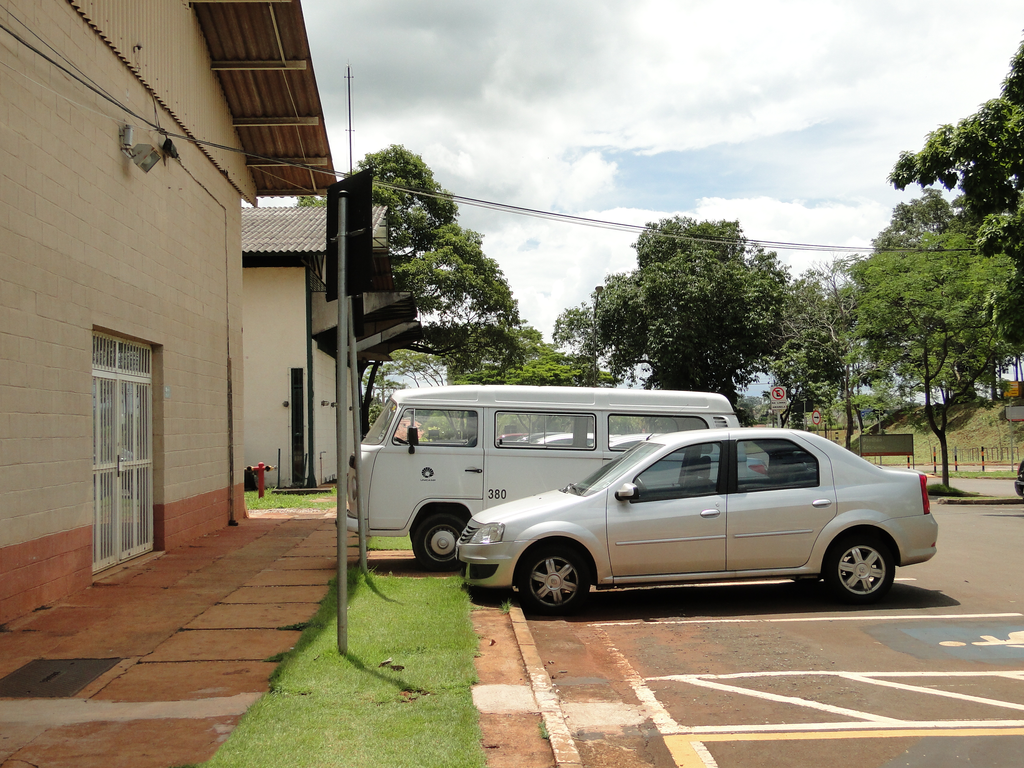

In [5]:
image = Image.open(pristine_path +'0ba8a5777136acae9e46cf63aa50dc10.png')
print(image.getdata)
image

<bound method Image.getdata of <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1389x1042 at 0x1EC9AA56C50>>


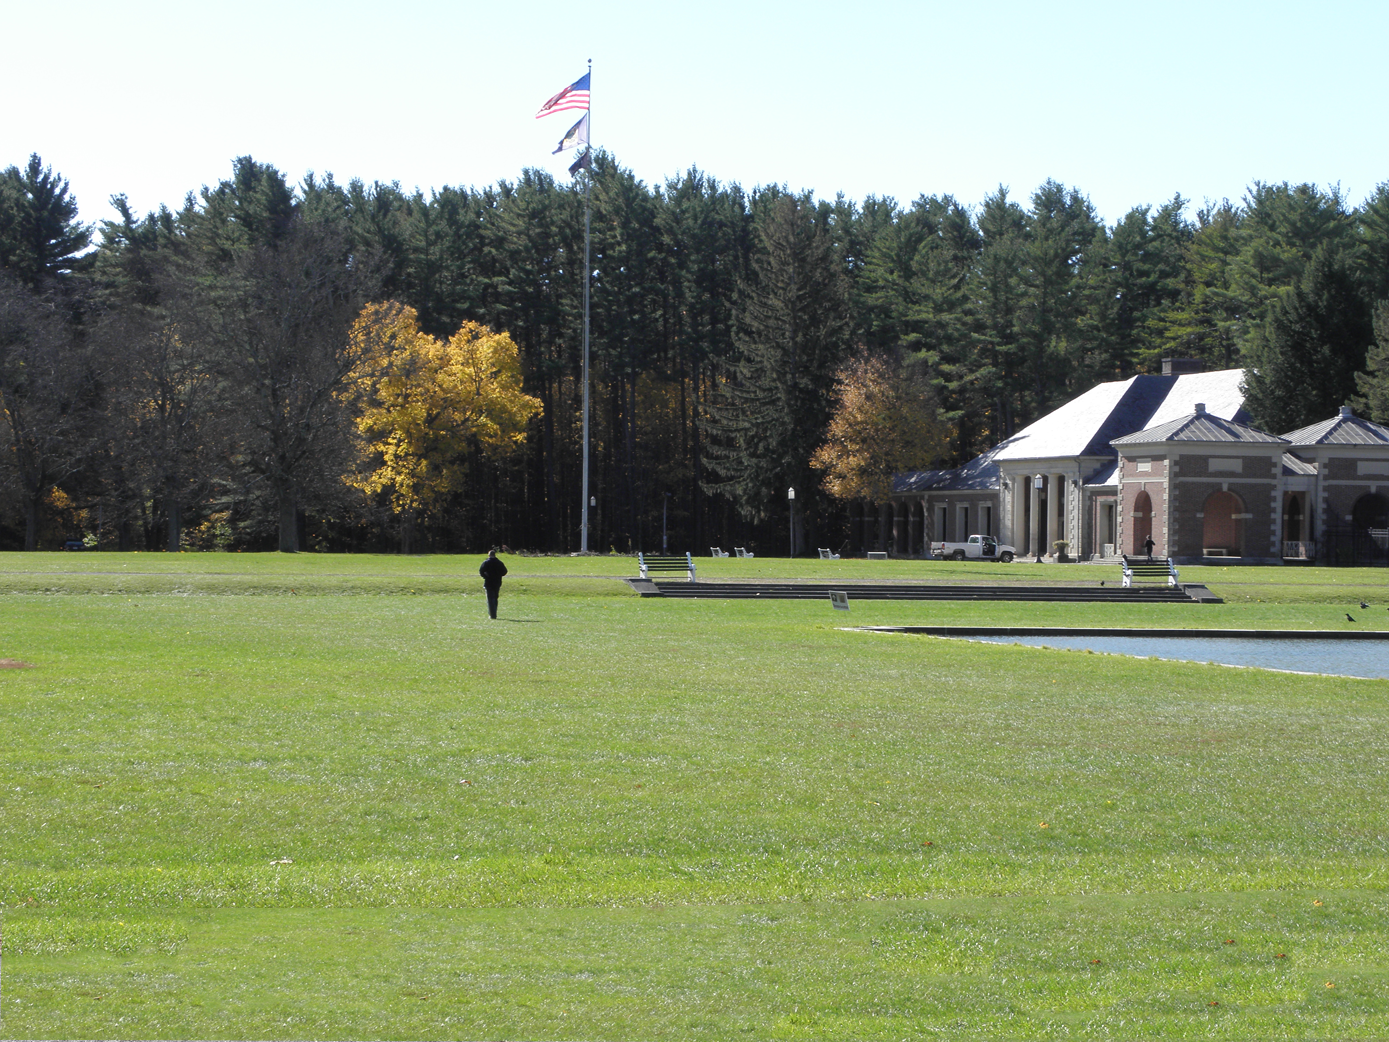

In [7]:
image = Image.open(fake_path +'cccbca215f38e9a03c46f73265bba889.png')
print(image.getdata)
image

In [13]:

# Time taken to run this cell : 0:00:02.437247
            
start = datetime.now()

fake_files = os.listdir(fake_path)
if not os.path.isdir(fake_path+'maskfiles/'):
    os.mkdir(fake+'maskfiles/')
    for file in fake_files:
        if len(file.split('.'))==3:
            shutil.move(fake_path+file, fake_path+'maskfiles/')
else:
    print('The files were present in the seperate folder(maskfiles)')
    
print("Time taken to run this cell :", datetime.now() - start)

The files were present in the seperate folder(maskfiles)
Time taken to run this cell : 0:00:00.003997


In [3]:
pristine_images = os.listdir(pristine_path)
fake_images = os.listdir(fake_path)

In [18]:

for i,file in enumerate(pristine_images):
    if i<20:
        if file != '.DS_Store':
            print("Shape : ", Image.open(pristine_path+file).size, "Mode : ",Image.open(pristine_path+file).mode,"file : ", file)

Shape :  (1024, 768) Mode :  RGB file :  0001d52e2fd94f30c2bca0449763a752.png
Shape :  (1024, 768) Mode :  RGB file :  000bc3906100ede4b1374cea075adedb.png
Shape :  (1024, 768) Mode :  RGB file :  002e23c036a05de656242f5ce6ab2e15.png
Shape :  (1024, 768) Mode :  RGB file :  003f2d6e572e2587ffa809f78ff4a5c4.png
Shape :  (1024, 768) Mode :  RGB file :  00d56bffe2d757a4e4625cc2d0bd0de9.png
Shape :  (1024, 683) Mode :  RGB file :  00dd93f9e4af553929e54e66c2a3186e.png
Shape :  (1024, 768) Mode :  RGB file :  00dffa8cb9db22527454bfa3c03b484b.png
Shape :  (1024, 768) Mode :  RGB file :  00e079b66d9e9f99892bbb81d9d6cd57.png
Shape :  (1024, 683) Mode :  RGB file :  00e3659be9c1fec47c739f79252840e3.png
Shape :  (1024, 768) Mode :  RGB file :  00ec0ffe0cd029ad4551680484a007d7.png
Shape :  (1024, 768) Mode :  RGB file :  00f2590c9968d4f36464ead50585e6eb.png
Shape :  (1024, 768) Mode :  RGB file :  00f2eadf3c83c55da30868177dfdc62d.png
Shape :  (1024, 681) Mode :  RGB file :  00fbcae4d05aeab62ab917e

In [20]:

for i,file in enumerate(fake_files):
    if i<20:
        if file != '.DS_Store' and len(file.split('.')) == 2:
            print("Shape : ", Image.open(fake_path+file).size, "->Mode : ",Image.open(fake_path+file).mode,"->file : ", file)

Shape :  (2048, 1536) ->Mode :  RGBA ->file :  010543abfbd0db1e9aa1b24604336e0c.png
Shape :  (1024, 768) ->Mode :  RGB ->file :  022354380a1a17ff49226c9eae21a11f.png
Shape :  (800, 600) ->Mode :  RGBA ->file :  0294345b3b2324b195cb3b30e91d7678.png
Shape :  (1024, 765) ->Mode :  RGB ->file :  0363353570f16ff0a73aa0a03a7795b8.png
Shape :  (1024, 768) ->Mode :  RGB ->file :  0830004e471e511458600f0763ce19f3.png
Shape :  (1024, 768) ->Mode :  RGB ->file :  08829849d0b1c71e437961e841e0c81f.png
Shape :  (3648, 2736) ->Mode :  RGB ->file :  0908dafde12041540b70d688315df6e9.png
Shape :  (3648, 2736) ->Mode :  RGB ->file :  092b43f88eab0ae3ecc0eb0ccbe37c82.png
Shape :  (1024, 768) ->Mode :  RGB ->file :  12362143f7e114beeb9d22dc59450f5a.png
Shape :  (1024, 768) ->Mode :  RGB ->file :  14548214e97adf237ee3bac90809baf6.png
Shape :  (2048, 1536) ->Mode :  RGBA ->file :  152681a0017a5fded699c43cd6df97d1.png
Shape :  (2048, 1536) ->Mode :  RGB ->file :  17030938cc2cb314cb87552dcc9516a4.png
Shape :  

In [48]:
start = datetime.now()
    
pristine_list = []
count = 0 
for file in pristine_images:
    if file != '.DS_Store':
        img = Image.open(pristine_path+file)
        if img.mode == 'RGBA' or img.mode == 'P':
            img = img.convert('RGB')
            img.save(pristine_path+file)
        if img.size[0] != 1024 or img.size[1] != 768:
            img = img.resize((1024,768))
            count = count+1
            
            # Printing after conversion
            print("Shape : ", img.size, "Mode : ",img.mode,"file : ", file)
            
            img.save(pristine_path+file)
        pristine_list.append(img)
    
            
print("Time taken to run this cell :", datetime.now() - start)

Shape :  (1024, 768) Mode :  RGB file :  03cd095b978da91503f8aa88c5dcfa82.png
Shape :  (1024, 768) Mode :  RGB file :  04f3c84abe8419ead6de6515a2dc05de.png
Shape :  (1024, 768) Mode :  RGB file :  05d3b0b133dced8dca1d5f977f1ec04d.png
Shape :  (1024, 768) Mode :  RGB file :  06c190007f980b9d58a25a6db433327a.png
Shape :  (1024, 768) Mode :  RGB file :  06f0bd10b361346e4dfe56d185421df1.png
Shape :  (1024, 768) Mode :  RGB file :  0a086c07d9673188438f32bb070344d5.png
Shape :  (1024, 768) Mode :  RGB file :  0a2f675be22415ca63ce0eb9041d68a6.png
Shape :  (1024, 768) Mode :  RGB file :  0a44837310aaf998acb05d0a651891e3.png
Shape :  (1024, 768) Mode :  RGB file :  0ad15fb810f4cf428742462824236158.png
Shape :  (1024, 768) Mode :  RGB file :  0ae09b5626dc5b360510e9efc9937fc0.png
Shape :  (1024, 768) Mode :  RGB file :  0b0a5ce7ab51abf3f58459e9f4281c43.png
Shape :  (1024, 768) Mode :  RGB file :  0b5c39145bec9a6266c2bc703d0d1c18.png
Shape :  (1024, 768) Mode :  RGB file :  0bad6f172bb05aa05f2ad78

Shape :  (1024, 768) Mode :  RGB file :  3caa8e3dbe2f3572dfb66cfea95a729e.png
Shape :  (1024, 768) Mode :  RGB file :  3cdaea0f3649ddf671135bb68aeb40f9.png
Shape :  (1024, 768) Mode :  RGB file :  3cf6fddc8d46fe592425f65b6afef9d4.png
Shape :  (1024, 768) Mode :  RGB file :  3d126250ce0c41ee56691620a636f3de.png
Shape :  (1024, 768) Mode :  RGB file :  3d219be8013149f5d3bedbe852c6cda9.png
Shape :  (1024, 768) Mode :  RGB file :  3d2b356774a090139a9bc1f41414e5a9.png
Shape :  (1024, 768) Mode :  RGB file :  3d4b212f8fcea18a455229e92eb4917f.png
Shape :  (1024, 768) Mode :  RGB file :  3d8c18013c2b1c4168e4cbbf9404aff8.png
Shape :  (1024, 768) Mode :  RGB file :  3dbe40a77b052f5d1708a7693997a6d7.png
Shape :  (1024, 768) Mode :  RGB file :  3dc028ca0e2f3710995b4a253ac2745c.png
Shape :  (1024, 768) Mode :  RGB file :  3e22205714f2a18e4b5b6f5e3d618876.png
Shape :  (1024, 768) Mode :  RGB file :  3e4860b730c20994297e663d93e2fb0f.png
Shape :  (1024, 768) Mode :  RGB file :  3ee46c9946fd48e2cdf159e

Shape :  (1024, 768) Mode :  RGB file :  7a12842cceed9dea2651fe3f0de5c7de.png
Shape :  (1024, 768) Mode :  RGB file :  7a5117d03ff3d17e0f0adcdaabe1ae7d.png
Shape :  (1024, 768) Mode :  RGB file :  7a84df684e01f8b9f3f1eb001c648d52.png
Shape :  (1024, 768) Mode :  RGB file :  7a945055cf5215f6721ed35d517fece7.png
Shape :  (1024, 768) Mode :  RGB file :  7ab599bd4a1f1d6df7c0c2bec67a4779.png
Shape :  (1024, 768) Mode :  RGB file :  7ac572a8917823cd8127c92788adab7d.png
Shape :  (1024, 768) Mode :  RGB file :  7ac72b3a5779aa5ee6c44a9816c2a844.png
Shape :  (1024, 768) Mode :  RGB file :  7ad78ee4501f6b96b06d1dbf9c6b3af4.png
Shape :  (1024, 768) Mode :  RGB file :  7adb9d32243310909277163361e1a834.png
Shape :  (1024, 768) Mode :  RGB file :  7b1f84db7a0cf65d002c19a855f560d4.png
Time taken to run this cell : 0:02:20.710632


In [49]:
count # pristine files modified 

222

In [52]:
start = datetime.now()
    
fake_list = []
fcount = 0 
for file in fake_images:
    if file != '.DS_Store' and len(file.split('.')) == 2:
        img = Image.open(fake_path+file)
        if img.mode != 'RGB':
            img = img.convert('RGB')
            img.save(fake_path+file)
        if img.size[0] != 1024 or img.size[1] != 768:
            img = img.resize((1024,768))
            fcount = fcount+1
            
            # Printing after conversion
            print("Shape : ", img.size, "Mode : ",img.mode,"file : ", file)
            
            img.save(fake_path+file)
        fake_list.append(img)
    
            
print("Time taken to run this cell :", datetime.now() - start)

Shape :  (1024, 768) Mode :  RGB file :  010543abfbd0db1e9aa1b24604336e0c.png
Shape :  (1024, 768) Mode :  RGB file :  0294345b3b2324b195cb3b30e91d7678.png
Shape :  (1024, 768) Mode :  RGB file :  0363353570f16ff0a73aa0a03a7795b8.png
Shape :  (1024, 768) Mode :  RGB file :  0908dafde12041540b70d688315df6e9.png
Shape :  (1024, 768) Mode :  RGB file :  092b43f88eab0ae3ecc0eb0ccbe37c82.png
Shape :  (1024, 768) Mode :  RGB file :  152681a0017a5fded699c43cd6df97d1.png
Shape :  (1024, 768) Mode :  RGB file :  17030938cc2cb314cb87552dcc9516a4.png
Shape :  (1024, 768) Mode :  RGB file :  1990a2ed067b8c537d8fe36d1ab4a7f2.png
Shape :  (1024, 768) Mode :  RGB file :  207763f02c2c5881c898386782da1728.png
Shape :  (1024, 768) Mode :  RGB file :  229f447c1a26a74005b3f058201bde3f.png
Shape :  (1024, 768) Mode :  RGB file :  237db9303fe590d8104510e36dfaa4a7.png
Shape :  (1024, 768) Mode :  RGB file :  244a7433a307b9a2c839cefe14c0ba1d.png
Shape :  (1024, 768) Mode :  RGB file :  2472627d9b38bce396254ac

Shape :  (1024, 768) Mode :  RGB file :  bea810fbe5f0ee59c79b4ebd4732f1a0.png
Shape :  (1024, 768) Mode :  RGB file :  bf3bbec50ea288905e42bbfaf2c682bc.png
Shape :  (1024, 768) Mode :  RGB file :  bf44b8a1a00a2e525426a4ad4bedfff9.png
Shape :  (1024, 768) Mode :  RGB file :  c0200dcf86e0c83a600efc4029561dbd.png
Shape :  (1024, 768) Mode :  RGB file :  c239a9a08c352ec88ad81d4099e0ebcb.png
Shape :  (1024, 768) Mode :  RGB file :  c26d812059636151e2d7264fa0a9fdbc.png
Shape :  (1024, 768) Mode :  RGB file :  c2ccae30ccc8189fe03319b604cdde8b.png
Shape :  (1024, 768) Mode :  RGB file :  c2e9e25b3f224a2bc80ca1f6dd86f465.png
Shape :  (1024, 768) Mode :  RGB file :  c6216855a09754f487980c889f7a8732.png
Shape :  (1024, 768) Mode :  RGB file :  c658e082c4a76075a2f91c731b1f79a0.png
Shape :  (1024, 768) Mode :  RGB file :  c66c01633c25f6b9861578432638508d.png
Shape :  (1024, 768) Mode :  RGB file :  c6ae44ca12707711f81c0380408db48d.png
Shape :  (1024, 768) Mode :  RGB file :  c6fd81dc1179711b70fa379

In [53]:
fcount # fake files modified

197

In [6]:
start = datetime.now()

pristine_list = []
pr_img = []
for file in pristine_images:
    try:
        img1 = Image.open(pristine_path+file)
        if file != '.DS_Store' and img1.size[0] == 1024 and img1.size[1] == 768:
            img = img1
            print("inner : ", img.size, "file : ",file)
    except FileNotFoundError:
        print("File not present")
    img = np.array(img)
    print("outer : ", img.shape, "file : ",file)
    pristine_list.append(img)
    pr_img.append(img)
        
pristine_array = np.array(pristine_list)   

print("Time taken to run this cell :", datetime.now() - start)

inner :  (1024, 768) file :  0001d52e2fd94f30c2bca0449763a752.png
outer :  (768, 1024, 3) file :  0001d52e2fd94f30c2bca0449763a752.png
inner :  (1024, 768) file :  000bc3906100ede4b1374cea075adedb.png
outer :  (768, 1024, 3) file :  000bc3906100ede4b1374cea075adedb.png
inner :  (1024, 768) file :  002e23c036a05de656242f5ce6ab2e15.png
outer :  (768, 1024, 3) file :  002e23c036a05de656242f5ce6ab2e15.png
inner :  (1024, 768) file :  003f2d6e572e2587ffa809f78ff4a5c4.png
outer :  (768, 1024, 3) file :  003f2d6e572e2587ffa809f78ff4a5c4.png
inner :  (1024, 768) file :  00d56bffe2d757a4e4625cc2d0bd0de9.png
outer :  (768, 1024, 3) file :  00d56bffe2d757a4e4625cc2d0bd0de9.png
inner :  (1024, 768) file :  00dd93f9e4af553929e54e66c2a3186e.png
outer :  (768, 1024, 3) file :  00dd93f9e4af553929e54e66c2a3186e.png
inner :  (1024, 768) file :  00dffa8cb9db22527454bfa3c03b484b.png
outer :  (768, 1024, 3) file :  00dffa8cb9db22527454bfa3c03b484b.png
inner :  (1024, 768) file :  00e079b66d9e9f99892bbb81d9

outer :  (768, 1024, 3) file :  07af4ffd4a3e7a37903b9a22affccfed.png
inner :  (1024, 768) file :  0a086c07d9673188438f32bb070344d5.png
outer :  (768, 1024, 3) file :  0a086c07d9673188438f32bb070344d5.png
inner :  (1024, 768) file :  0a0ab9a903587d083e7051adfb17a779.png
outer :  (768, 1024, 3) file :  0a0ab9a903587d083e7051adfb17a779.png
inner :  (1024, 768) file :  0a0c15a0561d670b4ce6cb940840cde6.png
outer :  () file :  0a0c15a0561d670b4ce6cb940840cde6.png
inner :  (1024, 768) file :  0a15c829c3beb36bf53e73654fb6ece0.png
outer :  (768, 1024, 3) file :  0a15c829c3beb36bf53e73654fb6ece0.png
inner :  (1024, 768) file :  0a2f675be22415ca63ce0eb9041d68a6.png
outer :  (768, 1024, 3) file :  0a2f675be22415ca63ce0eb9041d68a6.png
inner :  (1024, 768) file :  0a3006b3036b248b12e79bae44802ec3.png
outer :  (768, 1024, 3) file :  0a3006b3036b248b12e79bae44802ec3.png
inner :  (1024, 768) file :  0a412801ab3a58a44b58678d89e06b9f.png
outer :  (768, 1024, 3) file :  0a412801ab3a58a44b58678d89e06b9f.pn

outer :  (768, 1024, 3) file :  0c7ad0c72c3e925f556cb158f5983594.png
inner :  (1024, 768) file :  0c7dc8932182ef44dad31c88983675ce.png
outer :  (768, 1024, 3) file :  0c7dc8932182ef44dad31c88983675ce.png
inner :  (1024, 768) file :  0c877a349fb3ec64aac21974756cfb31.png
outer :  (768, 1024, 3) file :  0c877a349fb3ec64aac21974756cfb31.png
inner :  (1024, 768) file :  0ca4a6bf121ee206bf445358a7797ae5.png
outer :  (768, 1024, 3) file :  0ca4a6bf121ee206bf445358a7797ae5.png
inner :  (1024, 768) file :  0caa2820b192de50dd9000e25575c0d5.png
outer :  (768, 1024, 3) file :  0caa2820b192de50dd9000e25575c0d5.png
inner :  (1024, 768) file :  0cb63a63de368044d42c739f42623289.png
outer :  (768, 1024, 3) file :  0cb63a63de368044d42c739f42623289.png
inner :  (1024, 768) file :  0cd3336bcf6da64100be66bd613d493c.png
outer :  (768, 1024, 3) file :  0cd3336bcf6da64100be66bd613d493c.png
inner :  (1024, 768) file :  0cd373e75d0ef085624d3284c9072327.png
outer :  (768, 1024, 3) file :  0cd373e75d0ef085624d328

outer :  (768, 1024, 3) file :  0ed85a138e507c444443472369e8130c.png
inner :  (1024, 768) file :  0ee27ef0af1666bf7714830378253afb.png
outer :  (768, 1024, 3) file :  0ee27ef0af1666bf7714830378253afb.png
inner :  (1024, 768) file :  0ef0956de235a3db4c511c40d9dca1ba.png
outer :  (768, 1024, 3) file :  0ef0956de235a3db4c511c40d9dca1ba.png
inner :  (1024, 768) file :  0ef3cb6f8128f134955cee608831c5c1.png
outer :  (768, 1024, 3) file :  0ef3cb6f8128f134955cee608831c5c1.png
inner :  (1024, 768) file :  0f0b57e9462dd8ff7da1754bad94bc04.png
outer :  (768, 1024, 3) file :  0f0b57e9462dd8ff7da1754bad94bc04.png
inner :  (1024, 768) file :  0f1fe6db70e9da10f9653516e37e780a.png
outer :  (768, 1024, 3) file :  0f1fe6db70e9da10f9653516e37e780a.png
inner :  (1024, 768) file :  0f2019a8daafa28504cc98fe8c241cd0.png
outer :  (768, 1024, 3) file :  0f2019a8daafa28504cc98fe8c241cd0.png
inner :  (1024, 768) file :  0f215e9b7f0fbe5c6008d2f094d76df5.png
outer :  (768, 1024, 3) file :  0f215e9b7f0fbe5c6008d2f

inner :  (1024, 768) file :  1b2d8da303239dd9e189d58840825be5.png
outer :  (768, 1024, 3) file :  1b2d8da303239dd9e189d58840825be5.png
inner :  (1024, 768) file :  1b3418fba628777a5caa21206352dbdf.png
outer :  (768, 1024, 3) file :  1b3418fba628777a5caa21206352dbdf.png
inner :  (1024, 768) file :  1b3640a9d20d47b396fd82b04f768e02.png
outer :  (768, 1024, 3) file :  1b3640a9d20d47b396fd82b04f768e02.png
inner :  (1024, 768) file :  1b39fdabcc9fd280d7ef5d506da78603.png
outer :  (768, 1024, 3) file :  1b39fdabcc9fd280d7ef5d506da78603.png
inner :  (1024, 768) file :  1b3d595d91ba77637ac6ea6339af9af6.png
outer :  (768, 1024, 3) file :  1b3d595d91ba77637ac6ea6339af9af6.png
inner :  (1024, 768) file :  1b4bc069995090e56ff0722033b86c9a.png
outer :  (768, 1024, 3) file :  1b4bc069995090e56ff0722033b86c9a.png
inner :  (1024, 768) file :  1b5ca2ed819194c4ca3d2808eee0805a.png
outer :  (768, 1024, 3) file :  1b5ca2ed819194c4ca3d2808eee0805a.png
inner :  (1024, 768) file :  1b9b2acb177b1c54a37e297aa8

outer :  (768, 1024, 3) file :  1e5e8f13bf8b6995d73c58bc01e091d8.png
inner :  (1024, 768) file :  1e7e1e28696a329ad7aa12871f42c7a8.png
outer :  (768, 1024, 3) file :  1e7e1e28696a329ad7aa12871f42c7a8.png
inner :  (1024, 768) file :  1e849849f6d70d173492e5df23bd6aa7.png
outer :  (768, 1024, 3) file :  1e849849f6d70d173492e5df23bd6aa7.png
inner :  (1024, 768) file :  1e99d13fd200e7011c52bf995a70ed4d.png
outer :  (768, 1024, 3) file :  1e99d13fd200e7011c52bf995a70ed4d.png
inner :  (1024, 768) file :  1e9d183b2919ba8e66d24df72697b3ad.png
outer :  (768, 1024, 3) file :  1e9d183b2919ba8e66d24df72697b3ad.png
inner :  (1024, 768) file :  1eb6e347587776b69c5a86cd5985e5c7.png
outer :  (768, 1024, 3) file :  1eb6e347587776b69c5a86cd5985e5c7.png
inner :  (1024, 768) file :  1ebbb5a00989068e50000aaa5d5dd5fc.png
outer :  (768, 1024, 3) file :  1ebbb5a00989068e50000aaa5d5dd5fc.png
inner :  (1024, 768) file :  1ec8a66fae209ac812a39e11b033574b.png
outer :  (768, 1024, 3) file :  1ec8a66fae209ac812a39e1

outer :  (768, 1024, 3) file :  2aebdbf4206a92327dc990c39093d4fe.png
inner :  (1024, 768) file :  2aedbb2acbe0f9f75470ebab61871354.png
outer :  (768, 1024, 3) file :  2aedbb2acbe0f9f75470ebab61871354.png
inner :  (1024, 768) file :  2b1261c65916ea243a565d648f4f9494.png
outer :  (768, 1024, 3) file :  2b1261c65916ea243a565d648f4f9494.png
inner :  (1024, 768) file :  2b16863cf2902031bad97f7ae5962f85.png
outer :  (768, 1024, 3) file :  2b16863cf2902031bad97f7ae5962f85.png
inner :  (1024, 768) file :  2b19ca369730bd5d7818d21d015ff5c7.png
outer :  (768, 1024, 3) file :  2b19ca369730bd5d7818d21d015ff5c7.png
inner :  (1024, 768) file :  2b2eda55ae781fcf4fe0dc5281f8ca78.png
outer :  (768, 1024, 3) file :  2b2eda55ae781fcf4fe0dc5281f8ca78.png
inner :  (1024, 768) file :  2b32d604a1b9c593107d3b74d60af796.png
outer :  (768, 1024, 3) file :  2b32d604a1b9c593107d3b74d60af796.png
inner :  (1024, 768) file :  2b425bf927f84ad5e267e5a6b7fede07.png
outer :  (768, 1024, 3) file :  2b425bf927f84ad5e267e5a

inner :  (1024, 768) file :  2db8833d3d5124ba16bd699cac563af1.png
outer :  (768, 1024, 3) file :  2db8833d3d5124ba16bd699cac563af1.png
inner :  (1024, 768) file :  2dbcd37de21f5d9af5630b100c5e5cdd.png
outer :  (768, 1024, 3) file :  2dbcd37de21f5d9af5630b100c5e5cdd.png
inner :  (1024, 768) file :  2dbf3284113b5b416839df6b96170e0c.png
outer :  (768, 1024, 3) file :  2dbf3284113b5b416839df6b96170e0c.png
inner :  (1024, 768) file :  2dca3a446717e9259df1c61df79a3022.png
outer :  (768, 1024, 3) file :  2dca3a446717e9259df1c61df79a3022.png
inner :  (1024, 768) file :  2de34c80144f4a4e1846777bc4b8601f.png
outer :  (768, 1024, 3) file :  2de34c80144f4a4e1846777bc4b8601f.png
inner :  (1024, 768) file :  2df0f3666db9a7a2ae6766553776d145.png
outer :  (768, 1024, 3) file :  2df0f3666db9a7a2ae6766553776d145.png
inner :  (1024, 768) file :  2e029f00d10f62fe0c4025fb75bd72be.png
outer :  (768, 1024, 3) file :  2e029f00d10f62fe0c4025fb75bd72be.png
inner :  (1024, 768) file :  2e1c52515d76d6c335c10d07ac

outer :  (768, 1024, 3) file :  3abbc3e853e2e7e26827442a78794123.png
inner :  (1024, 768) file :  3abd80eedd0647331e6169739b6cb109.png
outer :  (768, 1024, 3) file :  3abd80eedd0647331e6169739b6cb109.png
inner :  (1024, 768) file :  3ac5956d2a2970df80078a3f61f9e3e2.png
outer :  (768, 1024, 3) file :  3ac5956d2a2970df80078a3f61f9e3e2.png
inner :  (1024, 768) file :  3ad07b4f9fba7043ad7f1d7b8d1ba322.png
outer :  (768, 1024, 3) file :  3ad07b4f9fba7043ad7f1d7b8d1ba322.png
inner :  (1024, 768) file :  3ada1cfc81ff966e956935aeeec5b354.png
outer :  (768, 1024, 3) file :  3ada1cfc81ff966e956935aeeec5b354.png
inner :  (1024, 768) file :  3ae3fc7adb528333c998aacb94ba11b5.png
outer :  (768, 1024, 3) file :  3ae3fc7adb528333c998aacb94ba11b5.png
inner :  (1024, 768) file :  3af268d0635db208721813c80d5a68a7.png
outer :  (768, 1024, 3) file :  3af268d0635db208721813c80d5a68a7.png
inner :  (1024, 768) file :  3af760298c434e279ebccc5351049751.png
outer :  (768, 1024, 3) file :  3af760298c434e279ebccc5

outer :  (768, 1024, 3) file :  3ce6870f7a7f169f4ef40b2cb6116df2.png
inner :  (1024, 768) file :  3ce72f69f1d70fa6f4251bf620c971af.png
outer :  (768, 1024, 3) file :  3ce72f69f1d70fa6f4251bf620c971af.png
inner :  (1024, 768) file :  3cf6fddc8d46fe592425f65b6afef9d4.png
outer :  (768, 1024, 3) file :  3cf6fddc8d46fe592425f65b6afef9d4.png
inner :  (1024, 768) file :  3cfab460cd775b2fc3261f9f9d387c9e.png
outer :  (768, 1024, 3) file :  3cfab460cd775b2fc3261f9f9d387c9e.png
inner :  (1024, 768) file :  3cfc9cc91c80cae3140e5c833ba03b6a.png
outer :  (768, 1024, 3) file :  3cfc9cc91c80cae3140e5c833ba03b6a.png
inner :  (1024, 768) file :  3d09c0ffdc59b4093d3c64e9500bfc59.png
outer :  (768, 1024, 3) file :  3d09c0ffdc59b4093d3c64e9500bfc59.png
inner :  (1024, 768) file :  3d126250ce0c41ee56691620a636f3de.png
outer :  (768, 1024, 3) file :  3d126250ce0c41ee56691620a636f3de.png
inner :  (1024, 768) file :  3d219be8013149f5d3bedbe852c6cda9.png
outer :  (768, 1024, 3) file :  3d219be8013149f5d3bedbe

inner :  (1024, 768) file :  3fe900e58322c1faf810391ed7a74a0f.png
outer :  (768, 1024, 3) file :  3fe900e58322c1faf810391ed7a74a0f.png
inner :  (1024, 768) file :  4a02214442af1a4e0aaa1c21a6ec4f88.png
outer :  (768, 1024, 3) file :  4a02214442af1a4e0aaa1c21a6ec4f88.png
inner :  (1024, 768) file :  4a1aa0cab7646c49d647bd8e4d975190.png
outer :  (768, 1024, 3) file :  4a1aa0cab7646c49d647bd8e4d975190.png
inner :  (1024, 768) file :  4a1bc3dfa2890535b3c20c233486dbb0.png
outer :  (768, 1024, 3) file :  4a1bc3dfa2890535b3c20c233486dbb0.png
inner :  (1024, 768) file :  4a28995506ac48854eb426a5e06c12d0.png
outer :  (768, 1024, 3) file :  4a28995506ac48854eb426a5e06c12d0.png
inner :  (1024, 768) file :  4a3c87626d683848038323bf2c172401.png
outer :  (768, 1024, 3) file :  4a3c87626d683848038323bf2c172401.png
inner :  (1024, 768) file :  4a3e54d07a648023c79fc962078abd0a.png
outer :  (768, 1024, 3) file :  4a3e54d07a648023c79fc962078abd0a.png
inner :  (1024, 768) file :  4a3fd0d22bf64c51d846e49a1d

inner :  (1024, 768) file :  4ccb92789d4b16af894e75c3e40f5e73.png
outer :  (768, 1024, 3) file :  4ccb92789d4b16af894e75c3e40f5e73.png
inner :  (1024, 768) file :  4cd5e9a9b028f804302bb435f3ba0548.png
outer :  (768, 1024, 3) file :  4cd5e9a9b028f804302bb435f3ba0548.png
inner :  (1024, 768) file :  4cf0e711b26495bbd617c8dcdc7a1585.png
outer :  (768, 1024, 3) file :  4cf0e711b26495bbd617c8dcdc7a1585.png
inner :  (1024, 768) file :  4cf8c68437ad78a666ba949f081b9e4d.png
outer :  (768, 1024, 3) file :  4cf8c68437ad78a666ba949f081b9e4d.png
inner :  (1024, 768) file :  4cfce60b3c6e30635dbcbae55d9e5f01.png
outer :  (768, 1024, 3) file :  4cfce60b3c6e30635dbcbae55d9e5f01.png
inner :  (1024, 768) file :  4cfe2ff1ec59759983580bc482258bff.png
outer :  (768, 1024, 3) file :  4cfe2ff1ec59759983580bc482258bff.png
inner :  (1024, 768) file :  4d1f45b47db78a09538e65ce848e9201.png
outer :  (768, 1024, 3) file :  4d1f45b47db78a09538e65ce848e9201.png
inner :  (1024, 768) file :  4d283451b5c0de93d5595d66e5

inner :  (1024, 768) file :  5a0a481b717fd0e0f199589da2eb3883.png
outer :  (768, 1024, 3) file :  5a0a481b717fd0e0f199589da2eb3883.png
inner :  (1024, 768) file :  5a11ffa108c7b9400c1fc8b53242fe75.png
outer :  (768, 1024, 3) file :  5a11ffa108c7b9400c1fc8b53242fe75.png
inner :  (1024, 768) file :  5a1423e388a2ff42ac9884e0dae7e715.png
outer :  (768, 1024, 3) file :  5a1423e388a2ff42ac9884e0dae7e715.png
inner :  (1024, 768) file :  5a17b3caed2b151f5ef2a9e5537cf007.png
outer :  (768, 1024, 3) file :  5a17b3caed2b151f5ef2a9e5537cf007.png
inner :  (1024, 768) file :  5a25dce69a98d43ba6e9006a27876124.png
outer :  (768, 1024, 3) file :  5a25dce69a98d43ba6e9006a27876124.png
inner :  (1024, 768) file :  5a2c17fb2299adfb232fb5c99b48afbc.png
outer :  (768, 1024, 3) file :  5a2c17fb2299adfb232fb5c99b48afbc.png
inner :  (1024, 768) file :  5a33babc5fab4dfb80959bfa892f18b0.png
outer :  (768, 1024, 3) file :  5a33babc5fab4dfb80959bfa892f18b0.png
inner :  (1024, 768) file :  5a35fdfa9e55ca28fc70cc73f3

outer :  (768, 1024, 3) file :  5d150087e7982172941a6f0fbc12e3f1.png
inner :  (1024, 768) file :  5d28aee5e48392f0fe737e169ec0ff59.png
outer :  (768, 1024, 3) file :  5d28aee5e48392f0fe737e169ec0ff59.png
inner :  (1024, 768) file :  5d2906d478cbdd5b02fb2ad442e76f08.png
outer :  (768, 1024, 3) file :  5d2906d478cbdd5b02fb2ad442e76f08.png
inner :  (1024, 768) file :  5d321e0464a6a1b6fa6509642c58b569.png
outer :  (768, 1024, 3) file :  5d321e0464a6a1b6fa6509642c58b569.png
inner :  (1024, 768) file :  5d47b7cdb1de7f7465c49c294c01680d.png
outer :  (768, 1024, 3) file :  5d47b7cdb1de7f7465c49c294c01680d.png
inner :  (1024, 768) file :  5d4d0449273a7e4619e6ab87124539df.png
outer :  (768, 1024, 3) file :  5d4d0449273a7e4619e6ab87124539df.png
inner :  (1024, 768) file :  5d5091a5871fb60d320a8f41b4bdab8e.png
outer :  (768, 1024, 3) file :  5d5091a5871fb60d320a8f41b4bdab8e.png
inner :  (1024, 768) file :  5d55fcb042a1b568e13fdfec9cf30dd7.png
outer :  (768, 1024, 3) file :  5d55fcb042a1b568e13fdfe

outer :  (768, 1024, 3) file :  5ff53374f20d12a37c315ec7288396b8.png
inner :  (1024, 768) file :  5ffc02d6500c2880a64809e92576f348.png
outer :  (768, 1024, 3) file :  5ffc02d6500c2880a64809e92576f348.png
inner :  (1024, 768) file :  6a19aa173506c2970237076ed0e4af0e.png
outer :  (768, 1024, 3) file :  6a19aa173506c2970237076ed0e4af0e.png
inner :  (1024, 768) file :  6a24f4633339b9d06bb8933e8db04389.png
outer :  (768, 1024, 3) file :  6a24f4633339b9d06bb8933e8db04389.png
inner :  (1024, 768) file :  6a26bca72eec83c3eb6290b471f76d72.png
outer :  (768, 1024, 3) file :  6a26bca72eec83c3eb6290b471f76d72.png
inner :  (1024, 768) file :  6a3361a9a38187153efc7e371d36200e.png
outer :  (768, 1024, 3) file :  6a3361a9a38187153efc7e371d36200e.png
inner :  (1024, 768) file :  6a42ba51a1090e25afd79f97144496ac.png
outer :  (768, 1024, 3) file :  6a42ba51a1090e25afd79f97144496ac.png
inner :  (1024, 768) file :  6a486ced414771ef1f43b76f25ecb472.png
outer :  (768, 1024, 3) file :  6a486ced414771ef1f43b76

outer :  (768, 1024, 3) file :  6bf3f0d65bcb5bbc6f569147662966a4.png
inner :  (1024, 768) file :  6bf7e89f058ea6de92a340222bf11bc8.png
outer :  (768, 1024, 3) file :  6bf7e89f058ea6de92a340222bf11bc8.png
inner :  (1024, 768) file :  6bfd67cde29d7bf424c265dad69c990a.png
outer :  (768, 1024, 3) file :  6bfd67cde29d7bf424c265dad69c990a.png
inner :  (1024, 768) file :  6bfdb3ff45f7307d29ea2ad92c4fbea9.png
outer :  (768, 1024, 3) file :  6bfdb3ff45f7307d29ea2ad92c4fbea9.png
inner :  (1024, 768) file :  6c27d16735cd04190b2999ad0a3c0129.png
outer :  (768, 1024, 3) file :  6c27d16735cd04190b2999ad0a3c0129.png
inner :  (1024, 768) file :  6c4886c8ae23964b735ceed09e39bb30.png
outer :  (768, 1024, 3) file :  6c4886c8ae23964b735ceed09e39bb30.png
inner :  (1024, 768) file :  6c494c868401b08e53c3d29e2b87b37b.png
outer :  (768, 1024, 3) file :  6c494c868401b08e53c3d29e2b87b37b.png
inner :  (1024, 768) file :  6c51ffa557b33c8904d870b53fd2eaa3.png
outer :  (768, 1024, 3) file :  6c51ffa557b33c8904d870b

outer :  (768, 1024, 3) file :  6e81892db1569782724a0234e610868a.png
inner :  (1024, 768) file :  6e8ac2c9c337555f3bdba36fe79f2560.png
outer :  (768, 1024, 3) file :  6e8ac2c9c337555f3bdba36fe79f2560.png
inner :  (1024, 768) file :  6e91f788bd7f03474fb5f7174ee3b4fe.png
outer :  (768, 1024, 3) file :  6e91f788bd7f03474fb5f7174ee3b4fe.png
inner :  (1024, 768) file :  6e9c303ac8d8f18c632c59dd324eb8fd.png
outer :  (768, 1024, 3) file :  6e9c303ac8d8f18c632c59dd324eb8fd.png
inner :  (1024, 768) file :  6ea15b5fb8f8090dd060b520a974599c.png
outer :  (768, 1024, 3) file :  6ea15b5fb8f8090dd060b520a974599c.png
inner :  (1024, 768) file :  6ecc743ad4d523e10f3b2215c5fd23c6.png
outer :  (768, 1024, 3) file :  6ecc743ad4d523e10f3b2215c5fd23c6.png
inner :  (1024, 768) file :  6edcaaee85abb0cd613657bdb5731a53.png
outer :  (768, 1024, 3) file :  6edcaaee85abb0cd613657bdb5731a53.png
inner :  (1024, 768) file :  6ee20c333152408dd599cc994f060f5a.png
outer :  (768, 1024, 3) file :  6ee20c333152408dd599cc9

### 128*128

In [4]:

# Time taken to run this cell : 0:00:02.437247
            
start = datetime.now()

fake_files = os.listdir(pristine_path)
if not os.path.isdir(pristine_path+'pristine_128/'):
    os.mkdir(pristine_path+'pristine_128/')
    for file in fake_files:
        img = Image.open(pristine_path+file)
        img = img.resize((128,128))
        # Printing after conversion
        print("Shape : ", img.size, "Mode : ",img.mode,"file : ", file)
            
        img.save(pristine_path+'pristine_128/'+file)
else:
    print('The files were present in the folder')
    
print("Time taken to run this cell :", datetime.now() - start)

Shape :  (128, 128) Mode :  RGB file :  0001d52e2fd94f30c2bca0449763a752.png
Shape :  (128, 128) Mode :  RGB file :  000bc3906100ede4b1374cea075adedb.png
Shape :  (128, 128) Mode :  RGB file :  002e23c036a05de656242f5ce6ab2e15.png
Shape :  (128, 128) Mode :  RGB file :  003f2d6e572e2587ffa809f78ff4a5c4.png
Shape :  (128, 128) Mode :  RGB file :  00d56bffe2d757a4e4625cc2d0bd0de9.png
Shape :  (128, 128) Mode :  RGB file :  00dd93f9e4af553929e54e66c2a3186e.png
Shape :  (128, 128) Mode :  RGB file :  00dffa8cb9db22527454bfa3c03b484b.png
Shape :  (128, 128) Mode :  RGB file :  00e079b66d9e9f99892bbb81d9d6cd57.png
Shape :  (128, 128) Mode :  RGB file :  00e3659be9c1fec47c739f79252840e3.png
Shape :  (128, 128) Mode :  RGB file :  00ec0ffe0cd029ad4551680484a007d7.png
Shape :  (128, 128) Mode :  RGB file :  00f2590c9968d4f36464ead50585e6eb.png
Shape :  (128, 128) Mode :  RGB file :  00f2eadf3c83c55da30868177dfdc62d.png
Shape :  (128, 128) Mode :  RGB file :  00fbcae4d05aeab62ab917e587b911f9.png

Shape :  (128, 128) Mode :  RGB file :  0bfae9d73141b3aa65511d530b95876c.png
Shape :  (128, 128) Mode :  RGB file :  0bfaef412dff8e9d3530ea8d73a1b6df.png
Shape :  (128, 128) Mode :  RGB file :  0c02991d988c7aac77614a8eb0b5e8fb.png
Shape :  (128, 128) Mode :  RGB file :  0c0b302cb4a6f593cbb34b803b6ad71f.png
Shape :  (128, 128) Mode :  RGB file :  0c2283a3fb12b580947542b7007f3299.png
Shape :  (128, 128) Mode :  RGB file :  0c29a6b5088c489ff4519ffee29ddb05.png
Shape :  (128, 128) Mode :  RGB file :  0c3a832aa9f599a19dec59b3b4c98b7f.png
Shape :  (128, 128) Mode :  RGB file :  0c420e5d4ad357c01f6f16d9d4c9a5c5.png
Shape :  (128, 128) Mode :  RGB file :  0c43945b3bd42eb2f0e68a7f7ed43db0.png
Shape :  (128, 128) Mode :  RGB file :  0c45175ffa0ef10d801c5e00e1687672.png
Shape :  (128, 128) Mode :  RGB file :  0c52110eaf52d61f9daddcc93ee3ac22.png
Shape :  (128, 128) Mode :  RGB file :  0c571459fc9efdcf53d2bfb202a88744.png
Shape :  (128, 128) Mode :  RGB file :  0c5c1072b1cb15fad32050433aff2cba.png

Shape :  (128, 128) Mode :  RGB file :  0ffbb259fb2cd7aeb3ba5f0297fdaf7e.png
Shape :  (128, 128) Mode :  RGB file :  1a04684234ef78eca92427d516137fed.png
Shape :  (128, 128) Mode :  RGB file :  1a17a41f584faa97befe50fdf72ba13d.png
Shape :  (128, 128) Mode :  RGB file :  1a1b92d5a6e24bca86cef1bfe98671a6.png
Shape :  (128, 128) Mode :  RGB file :  1a1d66303c66705aed0c480852a4b7ca.png
Shape :  (128, 128) Mode :  RGB file :  1a1e9618255c04a75c87e09aa00e666c.png
Shape :  (128, 128) Mode :  RGB file :  1a2a623cffbd44c0c4fcc0cf16b0e41f.png
Shape :  (128, 128) Mode :  RGB file :  1a2bab05359590e8fbc4d4f744cd0093.png
Shape :  (128, 128) Mode :  RGB file :  1a37f90245b4bda5da57c1ba3dfabe24.png
Shape :  (128, 128) Mode :  RGB file :  1a45b003ce835352e457100c10092f9a.png
Shape :  (128, 128) Mode :  RGB file :  1a5082cb3b581e5eefa5e9e5e9813b68.png
Shape :  (128, 128) Mode :  RGB file :  1a59d6491c0b8a7f8107346ebec894c3.png
Shape :  (128, 128) Mode :  RGB file :  1a5cfcd010b63ab468c1e3857a3e8fe6.png

Shape :  (128, 128) Mode :  RGB file :  1f281eccd72ee61ac5cba076d14239cb.png
Shape :  (128, 128) Mode :  RGB file :  1f2b12124cce250550cfe5baa209500b.png
Shape :  (128, 128) Mode :  RGB file :  1f30c386408b631e8d5704d406f9e54d.png
Shape :  (128, 128) Mode :  RGB file :  1f3cb8e3a0e12cd2108c52ebb00efcc4.png
Shape :  (128, 128) Mode :  RGB file :  1f3e0a9bbf1df8177a8369e2107fba4a.png
Shape :  (128, 128) Mode :  RGB file :  1f43b94aa7b64711ad40157a3b257a70.png
Shape :  (128, 128) Mode :  RGB file :  1f4a153b261229b3789db9c993afaf93.png
Shape :  (128, 128) Mode :  RGB file :  1f4c39b94d80a6efc535f24f80683e2a.png
Shape :  (128, 128) Mode :  RGB file :  1f51bb9d9f79557fcedfef1d3bc931bc.png
Shape :  (128, 128) Mode :  RGB file :  1f563ab49891d72b7d2cd06dd069f689.png
Shape :  (128, 128) Mode :  RGB file :  1f65722961c1f54001401933670c078e.png
Shape :  (128, 128) Mode :  RGB file :  1f7680e69568ce9b53e8f1c5b5474376.png
Shape :  (128, 128) Mode :  RGB file :  1f79c88ac393e9c1e2653884d8cbe736.png

Shape :  (128, 128) Mode :  RGB file :  2d7530637fce7dc799e344434cf2c1c1.png
Shape :  (128, 128) Mode :  RGB file :  2d7c8db37b351bc530a0c07865ed119c.png
Shape :  (128, 128) Mode :  RGB file :  2db8833d3d5124ba16bd699cac563af1.png
Shape :  (128, 128) Mode :  RGB file :  2dbcd37de21f5d9af5630b100c5e5cdd.png
Shape :  (128, 128) Mode :  RGB file :  2dbf3284113b5b416839df6b96170e0c.png
Shape :  (128, 128) Mode :  RGB file :  2dca3a446717e9259df1c61df79a3022.png
Shape :  (128, 128) Mode :  RGB file :  2de34c80144f4a4e1846777bc4b8601f.png
Shape :  (128, 128) Mode :  RGB file :  2df0f3666db9a7a2ae6766553776d145.png
Shape :  (128, 128) Mode :  RGB file :  2e029f00d10f62fe0c4025fb75bd72be.png
Shape :  (128, 128) Mode :  RGB file :  2e1c52515d76d6c335c10d07acdde14e.png
Shape :  (128, 128) Mode :  RGB file :  2e1f9b09b8e4cf324c74dc35753995d1.png
Shape :  (128, 128) Mode :  RGB file :  2e24d9377b08dd0ae207f7d6bd36753f.png
Shape :  (128, 128) Mode :  RGB file :  2e2750de54898cacfec9b14c4a9e1171.png

Shape :  (128, 128) Mode :  RGB file :  3c50dcf1847612d830b15384e28a6b20.png
Shape :  (128, 128) Mode :  RGB file :  3c51ba046b5b41173c15ee5764432aa2.png
Shape :  (128, 128) Mode :  RGB file :  3c61021caf93f68df55053972dce9394.png
Shape :  (128, 128) Mode :  RGB file :  3c68835fa4b3d1b0ced20fd4f6033e94.png
Shape :  (128, 128) Mode :  RGB file :  3c7aa424bd1693fe01da97967545b57e.png
Shape :  (128, 128) Mode :  RGB file :  3c8b49268fb4749b42d5d8562cbab9a6.png
Shape :  (128, 128) Mode :  RGB file :  3c8c56e88b6aebb17800b9b27ea69969.png
Shape :  (128, 128) Mode :  RGB file :  3c8dd1d909582baf90afea2dad266332.png
Shape :  (128, 128) Mode :  RGB file :  3c96827aeecd8b352463f7a820966137.png
Shape :  (128, 128) Mode :  RGB file :  3c98ecaf63ca996a99ce5c4c64d13f4c.png
Shape :  (128, 128) Mode :  RGB file :  3c9926472714107a12fe4737140b5709.png
Shape :  (128, 128) Mode :  RGB file :  3c9d8060490252c9af0d0a96a1d87844.png
Shape :  (128, 128) Mode :  RGB file :  3ca1b8967f5b36a0ee52651e2d3b7b79.png

Shape :  (128, 128) Mode :  RGB file :  4b1aed4cf210a63800b9f4f6c5d3ac1c.png
Shape :  (128, 128) Mode :  RGB file :  4b1b3f1ab4fcb051917f465385c0be22.png
Shape :  (128, 128) Mode :  RGB file :  4b243fcf098384448a72b601a800ca20.png
Shape :  (128, 128) Mode :  RGB file :  4b27ce4bea6a576d928932f005e954cb.png
Shape :  (128, 128) Mode :  RGB file :  4b2afad66eb966a4d353b1c00bbfd0a0.png
Shape :  (128, 128) Mode :  RGB file :  4b33a1dec66064fb01ba4f7e70573858.png
Shape :  (128, 128) Mode :  RGB file :  4b3ab18aafdd1e6e9efa91a0c298064d.png
Shape :  (128, 128) Mode :  RGB file :  4b516dc276883cb0f2df8828522f072d.png
Shape :  (128, 128) Mode :  RGB file :  4b6921cc84bc4f0a46e7b97f53359cdd.png
Shape :  (128, 128) Mode :  RGB file :  4b70f11a2570c4418d732d9f31a5efd5.png
Shape :  (128, 128) Mode :  RGB file :  4b7ae72ca3894218ffd360a50fd4b071.png
Shape :  (128, 128) Mode :  RGB file :  4b7b8a34f7e2c6f5208db509e602c364.png
Shape :  (128, 128) Mode :  RGB file :  4baf990399509704c5430ca0f743a51a.png

Shape :  (128, 128) Mode :  RGB file :  5a7ac41cc0da7b795bc07b124fcd1990.png
Shape :  (128, 128) Mode :  RGB file :  5a8aedde51934f344c287fae7e04451e.png
Shape :  (128, 128) Mode :  RGB file :  5a8b217c31ce6f3a8ab2dd283adc8b57.png
Shape :  (128, 128) Mode :  RGB file :  5aa1c48682cf136e4003520d390edca4.png
Shape :  (128, 128) Mode :  RGB file :  5ab014e9c782b5711c3bb02a7c8e8d74.png
Shape :  (128, 128) Mode :  RGB file :  5ab02a69fd1a14ae0a7801e27c2d9b5a.png
Shape :  (128, 128) Mode :  RGB file :  5aced0ab3e06a9428cf54767cd5b8df6.png
Shape :  (128, 128) Mode :  RGB file :  5ad5b5d6ed55c7219604a8ecffa32cbc.png
Shape :  (128, 128) Mode :  RGB file :  5ae4411f4460945953c0538f72f1e91a.png
Shape :  (128, 128) Mode :  RGB file :  5af9fa1ee49d7519c83c5c60f1ffade8.png
Shape :  (128, 128) Mode :  RGB file :  5b0aae9073ce0155da973d5c14ac0ea5.png
Shape :  (128, 128) Mode :  RGB file :  5b1086f364fc04a7618d93c0e1c01b42.png
Shape :  (128, 128) Mode :  RGB file :  5b166a348430539eb9c9be6ccce20a0e.png

Shape :  (128, 128) Mode :  RGB file :  5ffc02d6500c2880a64809e92576f348.png
Shape :  (128, 128) Mode :  RGB file :  6a19aa173506c2970237076ed0e4af0e.png
Shape :  (128, 128) Mode :  RGB file :  6a24f4633339b9d06bb8933e8db04389.png
Shape :  (128, 128) Mode :  RGB file :  6a26bca72eec83c3eb6290b471f76d72.png
Shape :  (128, 128) Mode :  RGB file :  6a3361a9a38187153efc7e371d36200e.png
Shape :  (128, 128) Mode :  RGB file :  6a42ba51a1090e25afd79f97144496ac.png
Shape :  (128, 128) Mode :  RGB file :  6a486ced414771ef1f43b76f25ecb472.png
Shape :  (128, 128) Mode :  RGB file :  6a486eca64c70c43eb1c9985458ffa97.png
Shape :  (128, 128) Mode :  RGB file :  6a5a499626b3e261fa2cb6cf15dcf59d.png
Shape :  (128, 128) Mode :  RGB file :  6a5a7b324744227f828329a29744ff2a.png
Shape :  (128, 128) Mode :  RGB file :  6a640f97276f02ddca6fafef1d8125b5.png
Shape :  (128, 128) Mode :  RGB file :  6a68286e27dacf32aeaf277854f493a6.png
Shape :  (128, 128) Mode :  RGB file :  6a6a958aed7cf8ebe19a744023665008.png

In [5]:

# Time taken to run this cell : 0:00:02.437247
            
start = datetime.now()

fake_files = os.listdir(fake_path)
if not os.path.isdir(fake_path+'fake_128/'):
    os.mkdir(fake_path+'fake_128/')
    for file in fake_files:
        img = Image.open(fake_path+file)
        img = img.resize((128,128))
        # Printing after conversion
        print("Shape : ", img.size, "Mode : ",img.mode,"file : ", file)
            
        img.save(fake_path+'fake_128/'+file)
else:
    print('The files were present in the folder')
    
print("Time taken to run this cell :", datetime.now() - start)

Shape :  (128, 128) Mode :  RGB file :  010543abfbd0db1e9aa1b24604336e0c.png
Shape :  (128, 128) Mode :  RGB file :  022354380a1a17ff49226c9eae21a11f.png
Shape :  (128, 128) Mode :  RGB file :  0294345b3b2324b195cb3b30e91d7678.png
Shape :  (128, 128) Mode :  RGB file :  0363353570f16ff0a73aa0a03a7795b8.png
Shape :  (128, 128) Mode :  RGB file :  0830004e471e511458600f0763ce19f3.png
Shape :  (128, 128) Mode :  RGB file :  08829849d0b1c71e437961e841e0c81f.png
Shape :  (128, 128) Mode :  RGB file :  0908dafde12041540b70d688315df6e9.png
Shape :  (128, 128) Mode :  RGB file :  092b43f88eab0ae3ecc0eb0ccbe37c82.png
Shape :  (128, 128) Mode :  RGB file :  12362143f7e114beeb9d22dc59450f5a.png
Shape :  (128, 128) Mode :  RGB file :  14548214e97adf237ee3bac90809baf6.png
Shape :  (128, 128) Mode :  RGB file :  152681a0017a5fded699c43cd6df97d1.png
Shape :  (128, 128) Mode :  RGB file :  17030938cc2cb314cb87552dcc9516a4.png
Shape :  (128, 128) Mode :  RGB file :  1848de26a06a7831457609429c92e2e7.png

Shape :  (128, 128) Mode :  RGB file :  a570fb86a76eefb5d38a74d029415770.png
Shape :  (128, 128) Mode :  RGB file :  a572d8a52f46accacc8eef19acb8759c.png
Shape :  (128, 128) Mode :  RGB file :  a607a69c1d589cf0e9d24ff6162abf01.png
Shape :  (128, 128) Mode :  RGB file :  a67721b7b84cb6e9649c67168d02274b.png
Shape :  (128, 128) Mode :  RGB file :  a749a9c6c906f0f57b9c91d13439bd6b.png
Shape :  (128, 128) Mode :  RGB file :  a768fceead79102801131160d76dc08b.png
Shape :  (128, 128) Mode :  RGB file :  a804a5a7b1a56f640962a7addd7a8c6f.png
Shape :  (128, 128) Mode :  RGB file :  a874d91dfcbe35e7204dce0845bcc71a.png
Shape :  (128, 128) Mode :  RGB file :  a8801babe463c8f0e32c2b338bb2acb8.png
Shape :  (128, 128) Mode :  RGB file :  a9411d7195ec9ac242d5fcb2f6ebf396.png
Shape :  (128, 128) Mode :  RGB file :  a9667850a5652972443b765ae3ccf3ff.png
Shape :  (128, 128) Mode :  RGB file :  aa2195acc0c17507e356e60955e30638.png
Shape :  (128, 128) Mode :  RGB file :  aa26ed5cf3896639bca34b372a774c4e.png

Shape :  (128, 128) Mode :  RGB file :  b81629220178f4be3d145ba0986852ce.png
Shape :  (128, 128) Mode :  RGB file :  b81643f10ef2075412532d13eb274b1e.png
Shape :  (128, 128) Mode :  RGB file :  b835388bf7843d20544c6de90d11c51c.png
Shape :  (128, 128) Mode :  RGB file :  b8cecf240477353bdf87aac6521e066f.png
Shape :  (128, 128) Mode :  RGB file :  b9149cc8a64a111bbc1b30cb1bdc37d4.png
Shape :  (128, 128) Mode :  RGB file :  b91fb5eb5b2ef55ad665fb6cd7f7b657.png
Shape :  (128, 128) Mode :  RGB file :  b933cdeb03094c3bcc8a2cb319830d15.png
Shape :  (128, 128) Mode :  RGB file :  b957bf062b8006317f24bdba5dd0abfe.png
Shape :  (128, 128) Mode :  RGB file :  b97db18acbee83be9760fb8eb8661652.png
Shape :  (128, 128) Mode :  RGB file :  b9988711e0a2880bb4fa8cf549dc55bc.png
Shape :  (128, 128) Mode :  RGB file :  b9b25dcdf5f40747e548cc9c92a261c2.png
Shape :  (128, 128) Mode :  RGB file :  b9b5386221a626f791fdd6cf400b73df.png
Shape :  (128, 128) Mode :  RGB file :  b9c5470e3233747c69d951707fc0caa1.png

Shape :  (128, 128) Mode :  RGB file :  cb5dece724ab947f6a615c7fe1f8c380.png
Shape :  (128, 128) Mode :  RGB file :  cb6206518534074f8981cb93da4283be.png
Shape :  (128, 128) Mode :  RGB file :  cb73316904b4dfa07e2f0066fdc91242.png
Shape :  (128, 128) Mode :  RGB file :  cb905e8bb50be791b394e69b45bfd8da.png
Shape :  (128, 128) Mode :  RGB file :  cbf35bfeb900387380e043ef4523ed7a.png
Shape :  (128, 128) Mode :  RGB file :  cbf729aea39780adc2e5a7a23c8f5c21.png
Shape :  (128, 128) Mode :  RGB file :  cc0c8e75290550c68a73f399760512a9.png
Shape :  (128, 128) Mode :  RGB file :  cc1234027ede8d9006ce01f0cd12b710.png
Shape :  (128, 128) Mode :  RGB file :  cc263a4c9ff9943acbb9049f637a0bed.png
Shape :  (128, 128) Mode :  RGB file :  cca2b0e3882574e1d8709e0f95c42565.png
Shape :  (128, 128) Mode :  RGB file :  cccbca215f38e9a03c46f73265bba889.png
Shape :  (128, 128) Mode :  RGB file :  ccedb1eb235f5dedddc443b93e9aaabd.png
Shape :  (128, 128) Mode :  RGB file :  cd22077ab23004ae566c5e09cecee05f.png

Shape :  (128, 128) Mode :  RGB file :  e44cb44a7cf02f5c4f9f4c2f0f62f3ce.png
Shape :  (128, 128) Mode :  RGB file :  e6764ef0fb7a2a0b624b554c89c62137.png
Shape :  (128, 128) Mode :  RGB file :  e7b762a90a95ff8d71497a6da103f649.png
Shape :  (128, 128) Mode :  RGB file :  e81d4326a9aba0df4346edaf4e64c0d0.png
Shape :  (128, 128) Mode :  RGB file :  e8540972740aa21638731940c3bebe42.png
Shape :  (128, 128) Mode :  RGB file :  e92c3770990b6a1fc78bc068a2e03b29.png
Shape :  (128, 128) Mode :  RGB file :  eba3f828ff79dc2f173e8f18bfcb8b4c.png
Shape :  (128, 128) Mode :  RGB file :  ed989064f7fbdd958ff3c242e4cdabeb.png
Shape :  (128, 128) Mode :  RGB file :  edb9414156ff96adf906cbba292e6cd4.png
Shape :  (128, 128) Mode :  RGB file :  eded2f92d413246c29001c448dbddd1b.png
Shape :  (128, 128) Mode :  RGB file :  eee3361e4c383c67789ef99c3a65fa8d.png
Shape :  (128, 128) Mode :  RGB file :  f0b605154f22ad7249c804668dcac3dd.png
Shape :  (128, 128) Mode :  RGB file :  f0d05a2fce59b068846bd1c8453d7d89.png

In [2]:
pristine_path = "C:/Users/Administrator/Documents/Datasets/Image Forensic Challenge/phase-01-training/dataset-dist/phase-01/training/pristine/pristine_128/"
fake_path  = "C:/Users/Administrator/Documents/Datasets/Image Forensic Challenge/phase-01-training/dataset-dist/phase-01/training/fake/fake_128/"

In [3]:
pristine_images = os.listdir(pristine_path)
fake_images = os.listdir(fake_path)

In [4]:
start = datetime.now()

pristine_list = []
pr_img = []
for file in pristine_images:
    try:   
        if file != '.DS_Store':
            img = Image.open(pristine_path+file)
    except FileNotFoundError:
        print("File not present")
        
    pristine_list.append(np.array(img))
    pr_img.append(img) 
    
pristine_array = np.array(pristine_list)   

print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:08.705171


In [5]:
start = datetime.now()

fake_list = []
fk_img = []
for file in fake_images:
    try:
        if file != '.DS_Store':
            img = Image.open(fake_path+file)
    except FileNotFoundError:
        print("File not present")     
    fake_list.append(np.array(img))
    fk_img.append(img)

fake_array = np.array(fake_list)
    
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:04.621257


In [6]:
print(pristine_array.shape)
print(fake_array.shape)
print(pristine_array[0].shape)
print(fake_array[0].shape)
print(type(pristine_array))
print(type(fake_array))

(1048, 128, 128, 3)
(450, 128, 128, 3)
(128, 128, 3)
(128, 128, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
class_labels = [0]*1048+[1]*450

img_array = []
img_array = np.vstack((pristine_array,fake_array))


In [8]:
img_array.shape

(1498, 128, 128, 3)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(img_array, class_labels, test_size=0.20, stratify=class_labels)

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the data
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (1198, 128, 128, 3)
x_test shape: (300, 128, 128, 3)
1198 train samples
300 test samples


In [11]:
nb_train_samples = x_train.shape[0]
nb_validation_samples = x_test.shape[0]
num_classes = 2

In [12]:
# input image dimensions
img_rows, img_cols = 128, 128

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 3)
    
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, fig):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [19]:
del model

In [20]:
from keras.layers.advanced_activations import PReLU

batch_size = 64
num_classes = 2
epochs = 30


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape,kernel_initializer='he_normal'))
model.add(Conv2D(64, (3,3), activation='relu',padding='same',kernel_initializer='he_normal')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), activation='relu' ,padding='same',kernel_initializer='he_normal')) 
model.add(Conv2D(64, (3,3), activation='relu' ,padding='same',kernel_initializer='he_normal')) 
model.add(Conv2D(64, (5,5), activation='relu' ,padding='same',kernel_initializer='he_normal'))          
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), activation='relu',padding='same',kernel_initializer='he_normal')) 
model.add(Conv2D(64, (3,3), activation='relu',padding='same',kernel_initializer='he_normal')) 
model.add(Conv2D(128, (7,7), activation='relu',padding='same',kernel_initializer='he_normal'))          
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
                 
model.add(Flatten())
                 
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
                 
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Train on 1198 samples, validate on 300 samples
Epoch 1/30
1198/1198 [==============================] - 393s 328ms/step - loss: 1.0375 - acc: 0.5326 - val_loss: 1.1436 - val_acc: 0.3900
Epoch 2/30
1198/1198 [==============================] - 390s 325ms/step - loss: 0.7878 - acc: 0.5835 - val_loss: 1.6110 - val_acc: 0.6467
Epoch 3/30
1198/1198 [==============================] - 401s 335ms/step - loss: 0.7383 - acc: 0.6210 - val_loss: 1.6942 - val_acc: 0.6767
Epoch 4/30
1198/1198 [==============================] - 399s 333ms/step - loss: 0.7215 - acc: 0.6427 - val_loss: 1.3171 - val_acc: 0.6700
Epoch 5/30
1198/1198 [==============================] - 380s 317ms/step - loss: 0.6726 - acc: 0.6594 - val_loss: 0.8519 - val_acc: 0.4900
Epoch 6/30
1198/1198 [==============================] - 391s 327ms/step - loss: 0.6906 - acc: 0.6628 - val_loss: 0.6553 - val_acc: 0.6900
Epoch 7/30
1198/1198 [==============================] - 396s 331ms/step - loss: 0.6363 - acc: 0.6828 - val_loss: 0.6677 - val

Test loss: 1.08490247964859
Test accuracy: 0.676666665871938


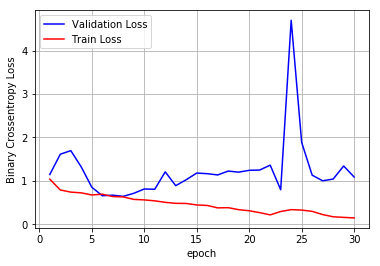

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, fig)

In [30]:
batch_size = 128
num_classes = 2
epochs = 20


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape,kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))          
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5,5), activation='relu',padding='same',kernel_initializer='he_normal'))          
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
                 
model.add(Flatten())
                 
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
                 
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Train on 1198 samples, validate on 300 samples
Epoch 1/20
1198/1198 [==============================] - 83s 69ms/step - loss: 0.9989 - acc: 0.5184 - val_loss: 0.8479 - val_acc: 0.7000
Epoch 2/20
1198/1198 [==============================] - 83s 69ms/step - loss: 0.8400 - acc: 0.5501 - val_loss: 0.6897 - val_acc: 0.6900
Epoch 3/20
1198/1198 [==============================] - 83s 69ms/step - loss: 0.7681 - acc: 0.5985 - val_loss: 0.6418 - val_acc: 0.6600
Epoch 4/20
1198/1198 [==============================] - 83s 69ms/step - loss: 0.7513 - acc: 0.6018 - val_loss: 0.6377 - val_acc: 0.6467
Epoch 5/20
1198/1198 [==============================] - 83s 69ms/step - loss: 0.6962 - acc: 0.6394 - val_loss: 0.6400 - val_acc: 0.6467
Epoch 6/20
1198/1198 [==============================] - 82s 69ms/step - loss: 0.6741 - acc: 0.6519 - val_loss: 0.6787 - val_acc: 0.5433
Epoch 7/20
1198/1198 [==============================] - 83s 69ms/step - loss: 0.6403 - acc: 0.6611 - val_loss: 0.6354 - val_acc: 0.6300
E

Test loss: 0.8884540824095408
Test accuracy: 0.7099999992052713


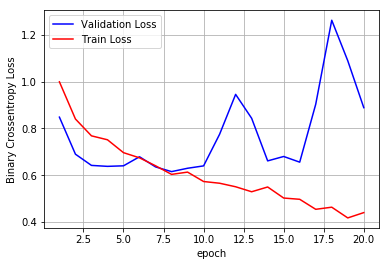

In [31]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, fig)

### Data Augmentation

In [43]:
datagen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

In [45]:
# fits the model on batches with real-time data augmentation:
history=model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=nb_train_samples // batch_size, epochs=epochs,validation_data=(x_test, y_test),
                           validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
18/18 [==============================] - 48s 3s/step - loss: 0.6364 - acc: 0.6545 - val_loss: 2.1628 - val_acc: 0.7000
Epoch 2/20
18/18 [==============================] - 46s 3s/step - loss: 0.6686 - acc: 0.6597 - val_loss: 1.0339 - val_acc: 0.6900
Epoch 3/20
18/18 [==============================] - 45s 2s/step - loss: 0.5924 - acc: 0.7011 - val_loss: 0.9752 - val_acc: 0.6967
Epoch 4/20
18/18 [==============================] - 45s 3s/step - loss: 0.7094 - acc: 0.6215 - val_loss: 0.6659 - val_acc: 0.6967
Epoch 5/20
18/18 [==============================] - 45s 2s/step - loss: 0.6180 - acc: 0.6743 - val_loss: 0.6917 - val_acc: 0.7033
Epoch 6/20
18/18 [==============================] - 46s 3s/step - loss: 0.6236 - acc: 0.6788 - val_loss: 0.6822 - val_acc: 0.7000
Epoch 7/20
18/18 [==============================] - 44s 2s/step - loss: 0.6213 - acc: 0.6980 - val_loss: 0.6338 - val_acc: 0.6833
Epoch 8/20
18/18 [==============================] - 46s 3s/step - loss: 0.6088 - acc: 0.67

Test loss: 0.6205917072296142
Test accuracy: 0.7000000007947286


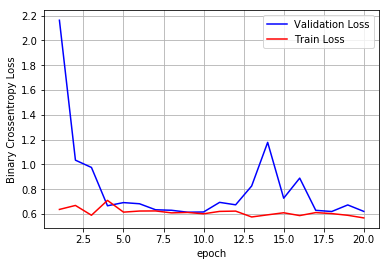

In [46]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, fig)

In [25]:
batch_size = 64
num_classes = 2
epochs = 30


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape,kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))          
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5,5), activation='relu',padding='same',kernel_initializer='he_normal'))          
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
                 
model.add(Flatten())
                 
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
                 
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [26]:
datagen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

In [27]:
# fits the model on batches with real-time data augmentation:
history=model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=nb_train_samples // batch_size, epochs=epochs,validation_data=(x_test, y_test),
                           validation_steps=nb_validation_samples // batch_size)

Epoch 1/30
18/18 [==============================] - 68s 4s/step - loss: 1.0904 - acc: 0.5139 - val_loss: 1.2506 - val_acc: 0.4200
Epoch 2/30
18/18 [==============================] - 59s 3s/step - loss: 0.8812 - acc: 0.5833 - val_loss: 1.5006 - val_acc: 0.3733
Epoch 3/30
18/18 [==============================] - 58s 3s/step - loss: 0.7785 - acc: 0.6238 - val_loss: 0.6939 - val_acc: 0.6467
Epoch 4/30
18/18 [==============================] - 59s 3s/step - loss: 0.8027 - acc: 0.6128 - val_loss: 0.7081 - val_acc: 0.5833
Epoch 5/30
18/18 [==============================] - 58s 3s/step - loss: 0.7652 - acc: 0.6123 - val_loss: 0.6823 - val_acc: 0.6133
Epoch 6/30
18/18 [==============================] - 59s 3s/step - loss: 0.7119 - acc: 0.6250 - val_loss: 0.6631 - val_acc: 0.6600
Epoch 7/30
18/18 [==============================] - 58s 3s/step - loss: 0.7005 - acc: 0.6478 - val_loss: 0.7009 - val_acc: 0.5767
Epoch 8/30
18/18 [==============================] - 59s 3s/step - loss: 0.7173 - acc: 0.63

Test loss: 0.6911264801025391
Test accuracy: 0.7000000007947286


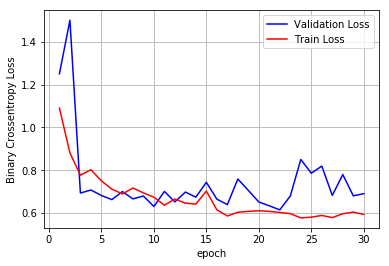

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, fig)

In [22]:
batch_size = 64
num_classes = 2
epochs = 50


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape,kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu',padding='same',kernel_initializer='glorot_normal'))          
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu',padding='same',kernel_initializer='glorot_normal'))          
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
                 
model.add(Flatten())
                 
model.add(Dense(256, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
                 
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [23]:
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [24]:
# fits the model on batches with real-time data augmentation:
history=model.fit_generator(datagen.flow(x_train, y_train),
                    steps_per_epoch=nb_train_samples // batch_size, epochs=epochs,validation_data=(x_test, y_test),
                           validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
19/19 [==============================] - 38s - loss: 1.1686 - acc: 0.5411 - val_loss: 0.8254 - val_acc: 0.3867
Epoch 2/50
19/19 [==============================] - 38s - loss: 1.0236 - acc: 0.5609 - val_loss: 0.6260 - val_acc: 0.6844
Epoch 3/50
19/19 [==============================] - 38s - loss: 0.8352 - acc: 0.6010 - val_loss: 0.6963 - val_acc: 0.6978
Epoch 4/50
19/19 [==============================] - 38s - loss: 0.8367 - acc: 0.6135 - val_loss: 0.6164 - val_acc: 0.7022
Epoch 5/50
19/19 [==============================] - 37s - loss: 0.7776 - acc: 0.5982 - val_loss: 0.6258 - val_acc: 0.6978
Epoch 6/50
19/19 [==============================] - 42s - loss: 0.7268 - acc: 0.6414 - val_loss: 0.6171 - val_acc: 0.6978
Epoch 7/50
19/19 [==============================] - 38s - loss: 0.7321 - acc: 0.6381 - val_loss: 0.6223 - val_acc: 0.6978
Epoch 8/50
19/19 [==============================] - 38s - loss: 0.7215 - acc: 0.6299 - val_loss: 0.6117 - val_acc: 0.6978
Epoch 9/50
19/19 [======

Test loss: 0.6187735754913753
Test accuracy: 0.68


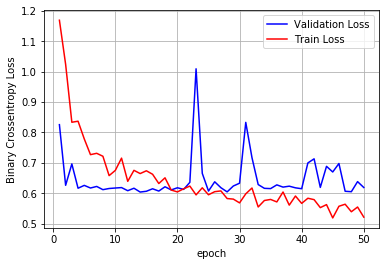

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, fig)

In [15]:
initial_model = vgg.VGG16(weights='imagenet',include_top=False,input_shape=x_train.shape[1:])

#last = initial_model.output 

In [16]:
initial_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

In [26]:
last_layer = initial_model.get_layer('block2_pool').output

In [31]:
x = Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
out = Dense(num_classes, activation='softmax')(x)
model = Model(initial_model.input, out)
model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adam(lr=0.00001),metrics=['accuracy'])
#model.summary()

In [32]:
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [33]:
# fits the model on batches with real-time data augmentation:
history=model.fit_generator(datagen.flow(x_train, y_train),
                    steps_per_epoch=nb_train_samples // batch_size, epochs=epochs,validation_data=(x_test, y_test),
                           validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
19/19 [==============================] - 232s - loss: 4.0752 - acc: 0.6382 - val_loss: 2.1772 - val_acc: 0.6844
Epoch 2/50
19/19 [==============================] - 219s - loss: 4.1567 - acc: 0.6546 - val_loss: 2.6237 - val_acc: 0.3733
Epoch 3/50
19/19 [==============================] - 221s - loss: 2.8887 - acc: 0.5735 - val_loss: 0.8677 - val_acc: 0.5867
Epoch 4/50
19/19 [==============================] - 220s - loss: 1.7781 - acc: 0.5789 - val_loss: 0.7665 - val_acc: 0.6578
Epoch 5/50
19/19 [==============================] - 218s - loss: 1.0432 - acc: 0.6521 - val_loss: 0.6447 - val_acc: 0.7022
Epoch 6/50
19/19 [==============================] - 221s - loss: 0.8867 - acc: 0.5921 - val_loss: 0.6705 - val_acc: 0.6267
Epoch 7/50
19/19 [==============================] - 218s - loss: 0.7015 - acc: 0.5447 - val_loss: 0.6404 - val_acc: 0.6444
Epoch 8/50
19/19 [==============================] - 221s - loss: 0.6793 - acc: 0.6168 - val_loss: 0.6116 - val_acc: 0.6889
Epoch 9/50
19/19

Test loss: 0.6071169148551093
Test accuracy: 0.6977777777777778


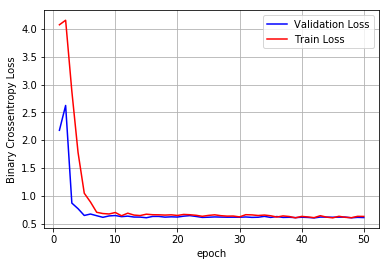

In [34]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, fig)

In [2]:
resnet_model = ResNet50(weights='imagenet',include_top=False,input_shape=x_train.shape[1:])

#last = initial_model.output 

NameError: name 'x_train' is not defined

In [44]:
model_aug.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
Total params: 14,714,688.0
Trainable params: 2,359,808.0
Non-trainable params: 12,354,880.0
_________________________________________________________________


In [52]:
del model_aug
del _top_model

NameError: name 'model_aug' is not defined

In [53]:
model_aug=Sequential()
model_aug.add(initial_model)

In [54]:
top_model=Sequential()
top_model.add(Flatten(input_shape=(4, 4, 512)))
#model_aug.add(Dropout(0.3))
top_model.add(Dense(256, activation='relu'))

top_model.add(Dense(2, activation='softmax'))

model_aug.add(top_model)

In [55]:
for layer in model_aug.layers[0].layers[:17]:
    layer.trainable=False


In [56]:
model_aug.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-6), metrics=['accuracy'])
print(model_aug.summary())
model_aug.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
sequential_9 (Sequential)    (None, 2)                 2097922   
Total params: 16,812,610.0
Trainable params: 4,457,730.0
Non-trainable params: 12,354,880.0
_________________________________________________________________
None
Train on 1273 samples, validate on 225 samples
Epoch 1/20
1273/1273 [==============================] - 415s - loss: 4.8103 - acc: 0.6999 - val_loss: 4.8447 - val_acc: 0.6978
Epoch 2/20
1273/1273 [==============================] - 381s - loss: 4.8103 - acc: 0.6999 - val_loss: 4.8447 - val_acc: 0.6978
Epoch 3/20
1273/1273 [==============================] - 383s - loss: 4.8103 - acc: 0.6999 - val_loss: 4.8447 - val_acc: 0.6978
Epoch 4/20
 640/1273 [==============>...............] - ETA: 164s - loss: 5.184

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, fig)

In [55]:
#initial_model = vgg.VGG16(weights=None,include_top=False,input_shape=x_train.shape[1:])
#
#train_datagen = ImageDataGenerator(horizontal_flip=False)
#
#train_datagen.fit(x_train)
#train_generator = train_datagen.flow(x_train,y_train,batch_size=batch_size)
#
#predict_size_train = nb_train_samples // batch_size
#
#train_data = initial_model.predict_generator(train_generator, predict_size_train,verbose = 1)
#
#
#
#val_datagen = ImageDataGenerator(
#    horizontal_flip=False)
#
#val_datagen.fit(x_test)
#val_generator = val_datagen.flow(x_test,y_test,batch_size=batch_size)
#
#predict_size_test = nb_validation_samples // batch_size
#
#val_data = initial_model.predict_generator(val_generator, predict_size_test,verbose = 1)




In [56]:
#
#model = Sequential()  
#model.add(Flatten(input_shape=train_data.shape[1:]))  
#model.add(Dense(256, activation='relu'))  
#model.add(Dropout(0.5))  
#model.add(Dense(num_classes, activation='softmax'))
#
#model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
#
#history = model.fit_generator(train_data, y_train,  
#          epochs=30,  
#          batch_size=batch_size,  
#          validation_data=(val_data, y_test))